<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Investigación, Desarrollo e Innovación II  ###
###  Tarea 5: Regresión por gradiente  ###

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Fernando Becerra <br>
Fecha entrega: Octubre 2, 2021 <br>

* * *

<br>
<br>

<br>
<br>

Genere un conjunto de datos $ (x_i,y_i) $  , en el que $ x_i=i $ para $ i=1,...,100 $  e $ y_i = x_i +3σ_i $, con σi un número aleatorio en [0,1). Utilice el método de gradiente descendente para estimar una recta de regresión lineal $ y=mx+b $, de forma que el error cuadrático medio se aproxime con 4 cifras significativas. Indique sus valores iniciales para $ m $ y $  b $ , el valor de $ η $, el error final obtenido, así como el número de épocas que fueron necesarias para obtenerlo. Grafique los puntos junto con la recta obtenida.

In [2]:
import sympy as sp
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

x = np.array(range(1,101))
sigma = np.random.rand(100)
y = x + 3*sigma
n = 100

Primero quiero graficar una superficie cercana a la resolución. Sabemos que $ a $ es probable que este cercano cero y $ b $ alrededor de 1.5, por lo tanto:

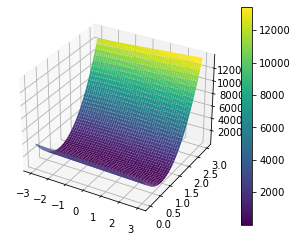

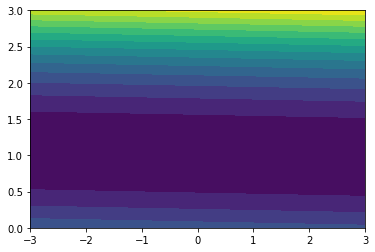

In [4]:
a = np.linspace(-3,3,1000)
b = np.linspace(0,3,1000)
matrix_y_estimada = []
matrix_errores = []
E = np.zeros((len(a), len(b)))
for i in range(len(a)):
    for j in range(len(b)):
        matrix_y_estimada.append(( a[j] + b[i]*x ))
        matrix_errores.append( (matrix_y_estimada[-1] - y)**2 )
        E[i, j] = (matrix_errores[-1]).mean()

A, B = np.meshgrid(a, b)
E_pd = pd.DataFrame(E, index=a, columns=b)
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A, B, E, cmap=cm.viridis)
fig.colorbar(surf)

plt.show() #show 3d surface

plt.contourf(A, B, E, 15, cmap=cm.viridis) #plot contour

Ahora el gradiente para una $ x $ y una constante.

In [15]:
a_t = 0 #considera a como constante b
b_t = 0 #b es m
alpha = 0.0001 #alpha es η
exactitud = 10**-3
iteraciones = 0
error = 1
while error >= exactitud:
    iteraciones += 1
    y_pred = b_t*x + a_t
    df_db = (-2/n)*sum(x*(y - y_pred))
    df_da = (-2/n)*sum(y - y_pred)
    error = np.sqrt(df_da**2 + df_db**2)
    error_cuadratico = ((y_pred - y )**2).mean() / 2
    b_t = b_t - alpha * df_db
    a_t = a_t - alpha * df_da
    
print(sp.N(b_t,4), sp.N(a_t,4), sp.N(error,4),
      sp.N(error_cuadratico,4), iteraciones)

0.9979763541822716 1.664128904525734 0.001000 0.3865 92881


Comenzando con $ m = 0 $,  $ b = 0 $ y $ η = 0.0001 $: <br>
El error cuadrático final obtenido fue 0.3864 y fueron necesarias 92,2881 iteraciones.<br>
$ m $ final es 0.9979 y $ b $ final es 1.6641.<br>
El error por medio de la norma 2 = 0.0009985.<br>

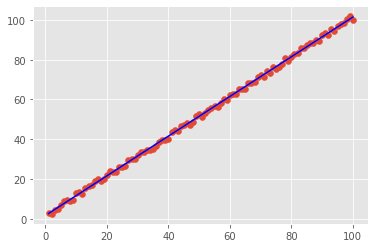

In [16]:
y_pred = b_t*x + a_t
plt.style.use('ggplot')
plt.scatter(x, y)
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='blue')
plt.show()

Generalice el método de gradiente descendente para encontrar la regresión lineal múltiple en un conjunto de datos con entradas $ (X_1,X_2,...,X_n) $ y salida Y, es decir, $ Y=α_0+α_1X_1+...+α_nX_n $. Utilice el modelo para encontrar la ecuación de regresión lineal para los datos en el siguiente archivo Descargar archivo. De nuevo, garantice que el error cuadrático medio se aproxime con 4 cifras significativas. Indique sus valores iniciales y finales para las $ α_i $, el valor de $ η $, el error final obtenido, así como el número de épocas que fueron necesarias para obtenerlo.

In [10]:
data = pd.read_excel("C:/Users/nuno/Downloads/tareaRGD.xlsx", "data")
data.head()

,x1,x2,x3,y
0,-0.11,1.00,0.04,-0.05
1,-0.11,0.98,0.98,0.69
2,-0.09,0.90,2.98,2.20
3,-0.08,2.00,-0.01,-1.14
4,-0.07,0.02,2.00,3.45


In [39]:
X = data[['x1', 'x2', 'x3']]
Y = np.array(data['y'])
beta = np.zeros(4)
# considera beta como los coeficientes de alpha descritos en el problema.
beta_t0 = beta.copy()
alpha = 0.00001
exactitud = 10**-3
iteraciones = 0
error = 1
n = len(X)

while error >= exactitud and iteraciones < 300000:
    iteraciones += 1
    y_pred = (np.array(beta[0]) +
                np.array(beta[1]*np.array(X.iloc[:,[0]]).reshape(64)) +
                np.array(beta[2]*np.array(X.iloc[:,[1]]).reshape(64)) +
                np.array(beta[3]*np.array(X.iloc[:,[2]]).reshape(64)))
    
    dB_0 = (-2/n)*sum(y_pred - Y)
    dB_1 = (-2/n)*sum(np.array(X.iloc[:,[0]]).reshape(64) * (Y - y_pred))
    dB_2 = (-2/n)*sum(np.array(X.iloc[:,[1]]).reshape(64) * (Y - y_pred))
    dB_3 = (-2/n)*sum(np.array(X.iloc[:,[2]]).reshape(64) * (Y - y_pred))
    
    error = np.sqrt(dB_0**2 + dB_1**2 + dB_2**2 + dB_3**2)
    error_cuadratico = ((y_pred - Y)**2).mean() / 2

    beta[0] = beta[0] - alpha*dB_0
    beta[1] = beta[1] - alpha*dB_1
    beta[2] = beta[2] - alpha*dB_2
    beta[3] = beta[3] - alpha*dB_3


In [41]:
print("El valor inicial de los estimadores es: " + str(beta_t0))
print("El valor final de los estimadores es: " + str(beta))
print("Usando η = " + str(alpha))
print("El error cuadrático fue " + str(sp.N(error_cuadratico,4)) +
      ", con " + str(iteraciones) + " iteraciones.")
print("El error por la norma dos termino en: " + str(sp.N(error,4)))

El valor inicial de los estimadores es: [0. 0. 0. 0.]
El valor final de los estimadores es: [-5.11594606  2.46479741 -0.52234688  1.8270777 ]
Usando η = 1e-05
El error cuadrático fue 4.533, con 300000 iteraciones.
El error por la norma dos termino en: 2.788
